In [2]:
# Importing Libraries 

import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt

dataset = pd.read_csv('E:/Machine_Learning/Minimizing_Churn_rates_Through_Analysis_of_Financial_Habits/Minimizing-Churn-Data/new_churn_data_s.csv')


In [3]:
# Data Preparation

user_identifier = dataset['user']
dataset = dataset.drop(columns = ['user'])

In [7]:
#One-Hot Encoding

dataset.housing.value_counts()
dataset = pd.get_dummies(dataset)
dataset.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [8]:
dataset = dataset.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [9]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns = 'churn'), dataset['churn'], test_size = 0.2,
                                                   random_state = 0)

In [10]:
# Balancing the Training set
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [11]:
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if(len(pos_index) > len(neg_index)):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes, ]
y_train = y_train[new_indexes]

In [12]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

In [13]:
# Model Building

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
#Predicting the test set

y_pred = classifier.predict(X_test)

Accuracy score:  0.6116666666666667
Precision score:  0.5211746522411128
Recall score:  0.7547000895255148
f1 score:  0.6165660998354361
Test Data Accuracy: 0.6117


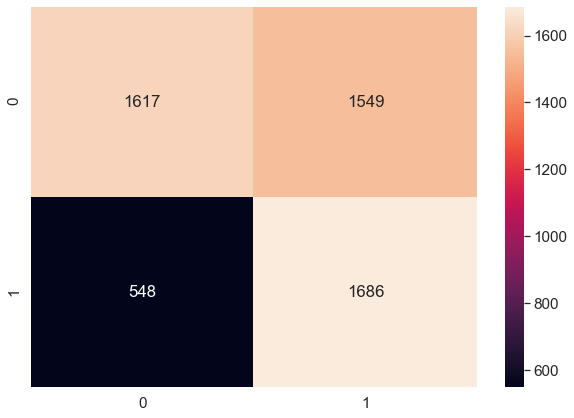

In [15]:
# Evaluating the results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [16]:
# Applying K-fold Cross-Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = X_train, y = y_train, cv = 10)

accuracies

array([0.64709172, 0.65044743, 0.6655481 , 0.65212528, 0.65324385,
       0.65436242, 0.63758389, 0.65212528, 0.62807606, 0.66610738])

In [17]:
accuracies.mean()

0.6506711409395974

In [20]:
# Analyzing coefficients

pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.152292
1,deposits,0.223048
2,withdrawal,0.037920
3,purchases_partners,-0.750471
4,purchases,-0.338995
5,cc_taken,0.075231
6,cc_recommended,0.056296
7,cc_disliked,-0.009590
8,cc_liked,-0.004158
9,cc_application_begin,0.015250


In [23]:
# Feature Selection

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Model to test
classifier = LogisticRegression()
rfe = RFE(classifier, 20)
rfe.fit(X_train, y_train)

C:\Users\sumit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [25]:
# summarize the selection of the attributes
print(rfe.support_)

[ True  True  True  True  True  True  True False False False False  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False  True False False False  True False False False
 False False False False False]


In [26]:
X_train.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'housing_O', 'payment_type_Weekly',
       'zodiac_sign_Capricorn'],
      dtype='object')

In [27]:
rfe.ranking_

array([ 1,  1,  1,  1,  1,  1,  1, 13, 18, 12, 21,  1,  1, 17,  1,  1,  1,
        1,  1,  1,  1,  1,  7,  1, 11,  8,  9, 10,  1, 15,  5,  3,  1, 20,
        6, 16,  2, 22, 14, 19,  4])

In [28]:
# Fitting Model to the Training Set

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(random_state=0)

In [29]:
#Predicting the test set

y_pred = classifier.predict(X_test[X_test.columns[rfe.support_]])

Accuracy score:  0.6077777777777778
Precision score:  0.5179012345679013
Recall score:  0.7511190689346464
f1 score:  0.6130800146145415
Test Data Accuracy: 0.6078


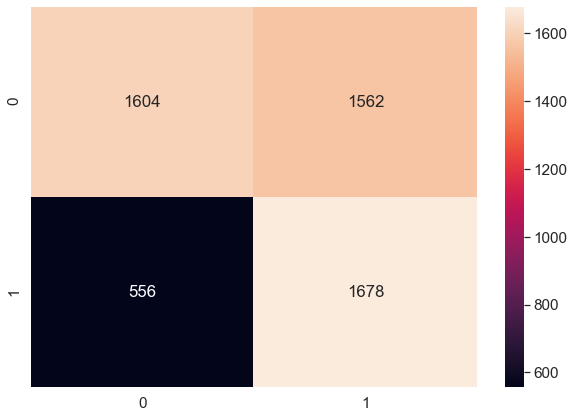

In [30]:
# Evaluating the results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test, y_pred))

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

So, we have achieved the same accuracy with half the number of features as before. Using less features makes our model simpler and fast.

In [31]:
# Analyzing coefficients

pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

,features,coef
0,age,-0.152104
1,deposits,0.228099
2,withdrawal,0.042224
3,purchases_partners,-0.741092
4,purchases,-0.338649
5,cc_taken,0.076617
6,cc_recommended,0.072972
7,web_user,0.108269
8,ios_user,0.076568
9,registered_phones,0.086585


In [33]:
# End of Model

#Formatting final Results

final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,1
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,1
5396,24291,1.0,1
5397,23740,0.0,1
5398,47663,1.0,0
